In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dropout, Dense, Conv2DTranspose, Concatenate
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras

Using TensorFlow backend.


In [2]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [39]:
input_img = Input(shape=(32, 32, 3))    # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

weights = x

encoded = MaxPooling2D((2, 2), padding='same')(x)



In [40]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras

In [79]:
#UNET Encoder
unet_input_img = Input(shape=(32, 32, 3))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv1_a')(unet_input_img)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv1_b')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2), name='pool1')(conv1)#16*16

conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv2_a')(pool1)
conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv2_b')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2), name='pool2')(conv2)#8*8

conv3 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv3_a')(pool2)
conv3 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv3_b')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2), name='pool3')(conv3)#4*4

conv4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv4_a')(pool3)
conv4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv4_b')(conv4)
drop4 = Dropout(0.5, name='drop4')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2), name='pool4')(conv4)#2*2

conv5 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv5_a')(pool4)
conv5 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv5_b')(conv5)
drop5 = Dropout(0.5)(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2), name='pool5')(conv5)#1*1

conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv6_a')(pool5)
conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv6_b')(conv6)
drop6 = Dropout(0.5)(conv6)#1*1

In [80]:
#UNET Decoder
up7 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (1,1))(drop6))
#2*2
#merge6 = Concatenate([drop4,up6], mode = 'concat', concat_axis = 3)
merge7 = Concatenate(axis = 3)([drop6,up7])
conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv6_up')(merge7)
conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv6_up_b')(conv7)

up8 = Conv2D(164, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='7_up')(UpSampling2D(size = (2,2))(conv7))
#4*4
#merge7 = Concatenate([conv3,up7], mode = 'concat', concat_axis = 3)
merge8 = Concatenate(axis = 3)([conv5,up8])
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv7_up')(merge8)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv7_up_b')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='up_8')(UpSampling2D(size = (2,2))(conv8))
#8*8
#merge8 = Concatenate([conv2,up8], mode = 'concat', concat_axis = 3)
merge9 = Concatenate(axis = 3)([conv4,up9])
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv8_up')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name='conv_8_b_up')(conv9)

up10 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv9))
#16*16
#merge9 = Concatenate([conv1,up9], mode = 'concat', concat_axis = 3)
merge10 = Concatenate(axis = 3)([conv3,up10])
conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv10)



up11 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv10))

#merge9 = Concatenate([conv1,up9], mode = 'concat', concat_axis = 3)
merge11 = Concatenate(axis = 3)([conv2,up11])
conv11 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge11)
conv11 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv11)

up12 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv11))
#merge9 = Concatenate([conv1,up9], mode = 'concat', concat_axis = 3)
merge12 = Concatenate(axis = 3)([conv1,up12])
conv12 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge12)
conv12 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv12)


conv12 = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv12)
#conv13 = Conv2D(1, 1, activation = 'sigmoid')(conv12)

model = Model(input = unet_input_img, output = conv12)

model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [81]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_a (Conv2D)                (None, 32, 32, 64)   1792        input_12[0][0]                   
__________________________________________________________________________________________________
conv1_b (Conv2D)                (None, 32, 32, 64)   36928       conv1_a[0][0]                    
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 16, 16, 64)   0           conv1_b[0][0]                    
__________________________________________________________________________________________________
conv2_a (C

In [82]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [83]:
x_train.shape

(50000, 32, 32, 3)

In [84]:
# you need to hav one emore decoder layer to have final outout 32,32,1
model.fit(x_train, x_train, epochs=1, batch_size=128, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='conv_autoencoder')], verbose=2)



Train on 50000 samples, validate on 10000 samples
Epoch 1/1
 - 1078s - loss: -1.9079e+03 - acc: 0.0012 - val_loss: -1.9215e+03 - val_acc: 9.2910e-04


In [77]:
decoded_imgs = model.predict(x_test)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
output_unet = model.predict(img)

In [91]:
flattened_conv6 = Flatten()(conv6) 

In [106]:
model.layers[19].output

<tf.Tensor 'up_sampling2d_124/ResizeNearestNeighbor:0' shape=(?, 1, 1, 64) dtype=float32>

In [ ]:
get_encoder_output = K.function([model.layers[0].input], [model.layers[19].output])
compressed_train = get_encoder_output([x_train])[0]

In [ ]:
compressed_train.shape

In [ ]:
compressed_train_reshaped = compressed_train.reshape(50000,64)

In [107]:
get_encoder_output = K.function([model.layers[0].input], [model.layers[19].output])
compressed = get_encoder_output([x_test])[0]

In [109]:
compressed.shape

(10000, 1, 1, 64)

In [110]:
#flatten compressed representation to 1 dimensional array
compressed_reshaped = compressed.reshape(10000,64)

In [112]:
compressed_reshaped.shape

(10000, 64)

In [113]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [114]:
X_embedded = TSNE(n_components=2).fit_transform(compressed_reshaped)

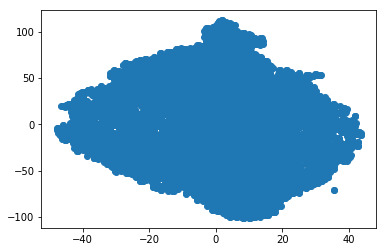

In [115]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [92]:
compressed_layer = 5
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[compressed_layer].output])
compressed = get_3rd_layer_output([x_test])[0]
 
#flatten compressed representation to 1 dimensional array
compressed = compressed.reshape(10000,7*7*2)

<tf.Tensor 'flatten_3/Reshape:0' shape=(?, ?) dtype=float32>